In [1]:
#imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

#keras
import keras
from keras import layers 
from keras.models import Sequential 

## Preparing data for ANN

In [2]:
#loading the dataset we created 
df = pd.read_csv("covid_dataset.csv")

#remove filename column 
df.drop(["filename"], axis=1, inplace=True)

#remove the ID column as it does not provide any information 
df.drop(["ID"], axis=1, inplace=True)

In [3]:
#mapping for the results 
map_dict = {"positive":1, "negative":0}

#mapping the values of the dict 
df['label'] = df['label'].map(map_dict)

In [4]:
#Shuffling the data set 
#since all the positives were first and negatives last
shuffle_train_df = df.reindex(np.random.permutation(df.index))

In [5]:
#labels
y = shuffle_train_df['label'].to_numpy()

#rest of data
X = (shuffle_train_df.iloc[:, :-1]).to_numpy()

In [6]:
#instantiate the Label Encoder 
le = LabelEncoder()

#fit and transform the encoder 
y = le.fit_transform(y)

#instantiate scaler 
stsc = StandardScaler()

#fit transform scaler 
X = stsc.fit_transform(X)

#separating the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Building, compiling and fitting ANN

In [11]:
#Building the ANN Model 
#ANN -> Artificial Neural Net 

#initialize a sequential model 
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#compiling 
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

#fitting
clf = model.fit(X_train, 
                y_train, 
                epochs=50, 
                batch_size=64, 
                validation_data=(X_test, y_test))

Epoch 1/50
6/6 [==============================] - 0s 29ms/step - loss: 1.9982 - accuracy: 0.4587 - val_loss: 1.2410 - val_accuracy: 0.9362
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.9680 - accuracy: 0.9144 - val_loss: 0.4607 - val_accuracy: 0.9362
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4772 - accuracy: 0.9144 - val_loss: 0.3028 - val_accuracy: 0.9362
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.3548 - accuracy: 0.9144 - val_loss: 0.2298 - val_accuracy: 0.9362
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.2495 - accuracy: 0.9144 - val_loss: 0.1838 - val_accuracy: 0.9362
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1930 - accuracy: 0.9205 - val_loss: 0.1843 - val_accuracy: 0.9574
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1847 - accuracy: 0.9511 - val_loss: 0.1643 - val_accuracy: 0.9574
Epoch 8/50
6/6 [=================

## Evaluating ANN

In [12]:
score = model.evaluate(X_test, 
                       y_test, 
                      batch_size=16,
                      steps=9)

9/9 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9787


In [13]:
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('COVID-19 Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.savefig("./img/Fig6_Confusion_Matrix_50_epochs.png")
    plt.show()

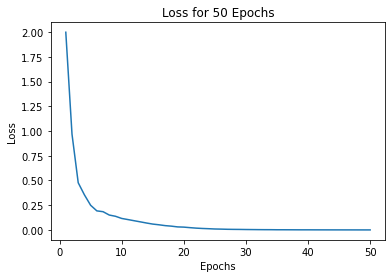

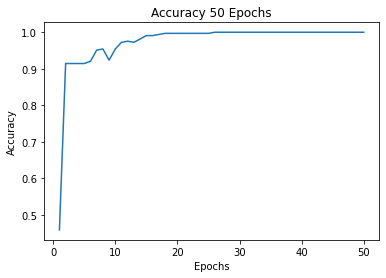


 **Confusion Matrix**



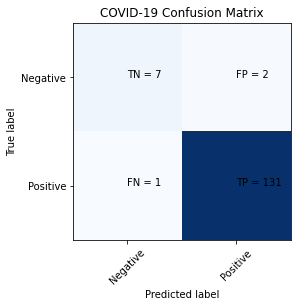


 **Classification Report**

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.98      0.99      0.99       132

    accuracy                           0.98       141
   macro avg       0.93      0.89      0.91       141
weighted avg       0.98      0.98      0.98       141



In [14]:
def plot_loss_accuracy(clf):
    loss_clf = clf.history['loss']
    acc_clf = clf.history['accuracy']
    epoch_range = list(range(1, 51))

    plt.figure()
    plt.plot(epoch_range, loss_clf)
    plt.title(f"Loss for {len(epoch_range)} Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.savefig("./img/Fig4_Loss_Per_50_Epochs.png")


    plt.figure()
    plt.plot(epoch_range, acc_clf)
    plt.title(f"Accuracy {len(epoch_range)} Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.savefig("./img/Fig5_Accuracy_per_50_epochs.png")
    plt.show()
    
    y_pred = model.predict_classes(X_test)
    print("\n **Confusion Matrix**\n")
    #print(confusion_matrix(y_test, y_pred))
    plot_confusion_matrix(cm)
    print("\n **Classification Report**\n")
    print(classification_report(y_test, y_pred))

plot_loss_accuracy(clf)    